# Modelos avanzados para el análisis de datos


## Exercise 13: Analyze class homeworks


**Integrantes:**

- Catalina Lago Martinez 201113637
- Jhair Rodriguez Riveros 201819361
- Daniela Sanabria Guerrero 201116798
- Viviana Muñoz 201920081

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
data = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [3]:
data.iloc[6]

Genero                                                                                        M
E1 - Examples of Time Series Analysis                                                       NaN
E4 - Panel Data                               Un paso crucial antes de empezar a predecir da...
E6 - Decison Trees                            Los árboles de decisión son algoritmos que per...
E8 - Ensemble Trees Overview                  En machine learning, los métodos de ensamble s...
E10 - REST-API                                La arquitectura de microservicios, o simplemen...
E11 - Natural Language Processing Overview                                                  NaN
Name: 6, dtype: object

# Exercise 13.1

#Analyze the writing patterns of each student

In [4]:
data.columns

Index(['Genero', 'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E11 - Natural Language Processing Overview'],
      dtype='object')

In [5]:
#Se reemplazan los vacíos con espacios

data.fillna(' ', inplace=True)

In [6]:
#Se descargan algunos diccionarios predefinidos de Stopwords

stopwords_español=pd.read_json('https://countwordsfree.com/stopwords/spanish/json', typ='series')
stopwords_ingles=pd.read_json('https://countwordsfree.com/stopwords/english/json', typ='series')
stopwords_total=list(stopwords_ingles)[0]+list(stopwords_español)[0]+['50','100','200' ,'mas']

En primer lugar, se quiere encontar las diez palabras más frecuentes en cada una de las tareas para cada uno de los estudiantes. Para ello se utilizará CountVectorizer. Se eliminarán las tildes y las stopwords para encontrar palabras relevantes.

In [7]:
palabras_frecuentes=pd.DataFrame(columns=range(1,7), index=data.index)

for i in range(len(data)):
    
    X=data.drop(columns=['Genero'])
    X=X.iloc[i,:]
    
    vect = CountVectorizer(stop_words=stopwords_total, strip_accents='ascii')
    X_dtm = vect.fit_transform(X)
    tf = pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names())
    tf = tf.transpose()
    
    vocabulario=vect.vocabulary_
    
    for j in range(6):
        palabras=tf.iloc[:,j].sort_values(ascending=False)[:10]
        palabras_frecuentes.iloc[i,j]=list(palabras.index)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ademas', 'afirmo', 'agrego', 'ahi', 'ain', 'algun', 'anadio', 'aseguro', 'asi', 'aun', 'comento', 'considero', 'couldn', 'daren', 'dejo', 'demas', 'despues', 'didn', 'doesn', 'don', 'estara', 'explico', 'expreso', 'habia', 'habian', 'habra', 'hadn', 'hasn', 'haven', 'indico', 'informo', 'isn', 'itse', 'll', 'llego', 'manifesto', 'mayn', 'menciono', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'ningun', 'oughtn', 'podra', 'podran', 'proximo', 'proximos', 'quedo', 'realizo', 'segun', 'senalo', 'sera', 'seran', 'seria', 'shan', 'shouldn', 'tambien', 'tendra', 'tendran', 'tenia', 'todavia', 'traves', 'ultima', 'ultimas', 'ultimos', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Lo anterior nos resulta en un DataFrame donde las columnas representan cada una de las tareas y los valores una lista de las palabras más frecuentes de cada tarea para cada estudiante. 

In [8]:
palabras_frecuentes

,1,2,3,4,5,6
0,"[financial, time, moving, price, stock, market...","[data, time, series, panel, single, collection...","[decision, node, represents, data, trees, node...","[data, random, technique, ensemble, models, ba...","[microservicios, aplicaciones, independientes,...","[yearly, evaluation, elementos, enable, enfoqu..."
1,"[ventas, temperatura, nino, periodos, paises, ...","[informacion, serie, datos, ejemplos, series, ...","[decision, arboles, gini, https, variables, as...","[modelos, ensamblaje, modelo, https, metodos, ...","[microservices, modulos, https, aplicaciones, ...","[youtube, encuesta, ente, ensembles, ensemble,..."
2,"[demanda, analisis, comportamiento, traves, co...","[wrong, estabilidad, encontrar, energia, enfoq...","[decision, arboles, variable, interes, algorit...","[ensemble, learning, models, set, methods, mod...","[microservicios, aplicaciones, aplicacion, arq...","[legal, law, text, algorithm, feature, lexis, ..."
3,"[chain, hotel, data, set, analysis, order, tim...","[time, data, panel, series, balanced, datasets...","[decision, trees, tree, random, function, algo...","[methods, ensemble, model, data, trees, models...","[services, micro, development, application, fu...","[year, cut, diagnosis, difference, differentia..."
4,"[time, series, consumption, pressure, blood, a...","[data, time, cross, type, series, years, set, ...","[2008, trees, rokach, algorithm, tree, decisio...","[learning, boosting, machine, method, trees, m...","[microservices, architecture, application, ser...","[language, natural, read, hard, complicated, a..."
5,"[time, series, data, tsa, interval, predict, t...","[individuos, datos, paneles, panel, observacio...","[modelos, arboles, datos, decision, informacio...","[years, escalabilidad, ejecuta, ejecutando, en...","[microservicios, informacion, servicios, web, ...","[years, escalabilidad, ejecuta, ejecutando, en..."
6,"[vuelve, votacion, elijan, empezar, empresas, ...","[datos, series, periodo, bases, tipo, panel, v...","[decision, nodos, arboles, entropia, atributo,...","[modelos, probabilidad, modelo, ensamble, erro...","[microservicios, software, diversas, partes, p...","[vuelve, votacion, elijan, empezar, empresas, ..."
7,"[series, prediccion, cano, botero, bolsa, apli...","[datos, series, panel, labra, torecillas, dist...","[arboles, prediccion, metodos, boosting, entre...","[modelo, metodos, ensamble, sesgo, datos, mode...","[arquitectura, componentes, servicios, permite...","[zhang, eficientes, destacar, diferencia, difi..."
8,"[demanda, caso, pais, cantidad, planeacion, se...","[datos, panel, individuo, comportamiento, dina...","[clasificacion, metodo, resultados, capacidad,...","[web, estrategia, estacional, escalabilidad, e...","[forma, agil, programacion, software, aplicaci...","[web, estrategia, estacional, escalabilidad, e..."
9,"[bolsa, pronosticos, energia, inflacion, anali...","[datos, observaciones, panel, fenomenos, serie...","[decision, posibles, arboles, ratio, ramas, pr...","[modelos, modelo, combina, metodo, estimacione...","[servicio, aplicacion, arquitectura, escalar, ...","[vuelven, especializada, error, equivalen, ent..."


Por su parte, se revisará qué tanto se repiten las palabras a través de las tareas.

In [9]:
X=data.drop(columns=['Genero'])
palabras_frecuentes['total']=X.sum(axis=1)

In [10]:
palabras_estudiantes=pd.DataFrame(columns=['estudiante', 'palabra', 'frecuencia'])

for i in range(len(data)):
    X=palabras_frecuentes['total'][i]
    vect = CountVectorizer(stop_words=stopwords_total, strip_accents='ascii')
    X_dtm = vect.fit_transform([X])
    tf = pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names())
    f = pd.DataFrame(tf.sum(axis=0).sort_values(ascending=False)[:10])
    palabras_estudiante = pd.DataFrame({'estudiante':[i]*10, 'palabra':f.index, 'frecuencia':f[0]})
    palabras_estudiantes=palabras_estudiantes.append(palabras_estudiante, ignore_index=True)

La siguiente tabla muestra las palabras más frecuentes de los estudiantes en todas las tareas y el número total de veces que las repiten. 

In [11]:
palabras_estudiantes

,estudiante,palabra,frecuencia
0,0,data,14
1,0,decision,11
2,0,time,9
3,0,node,9
4,0,microservicios,8
...,...,...,...
455,45,series,7
456,45,problemas,7
457,45,aplicaciones,7
458,45,prediccion,6


In [13]:
#En orden de frecuencia
palabras_estudiantes.sort_values(ascending=False, by='frecuencia')

,estudiante,palabra,frecuencia
270,27,data,29
160,16,datos,22
300,30,https,20
301,30,obtenido,20
440,44,datos,19
...,...,...,...
89,8,comportamiento,3
84,8,clasificacion,3
137,13,persona,2
138,13,rutas,2


In [14]:
#En general, las palabras más repetidas por todos los estudiantes son las siguientes:
palabras_estudiantes.groupby('palabra').agg({'frecuencia':'sum'}).sort_values(ascending=False, by='frecuencia').head(20)

,frecuencia
palabra,
datos,366
arboles,201
modelos,196
decision,164
series,141
microservicios,139
data,124
time,113
modelo,111


# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

In [16]:
X=data.drop(columns=['Genero'])

In [17]:
X

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,
1,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,
2,Una serie de tiempo es una colección de datos ...,,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,
4,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",,Los microservicios son servicios web con alcan...,
6,,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",
7,El análisis de series de tiempo (TSA) tiene un...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,
8,Ejemplo 1: número de estudiantes semestrales i...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,,Los microservicios es un tipo de arquitectura ...,
9,"Pronósticos de producción, análisis de inflaci...",Una serie de tiempo contiene observaciones de ...,Arboles de decisión \nLos árboles de decisión ...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,


In [18]:
def similariedad(series):
    vect = CountVectorizer(stop_words=stopwords_total, strip_accents='ascii')
    X_dtm = vect.fit_transform(series)
    X_dtm.todense()
    cos=cosine_similarity(X_dtm.todense())
    cos=pd.DataFrame(cos)
    sum_cos = cos.sum().sort_values(ascending=True).index.values
    cos2=cos.iloc[sum_cos, sum_cos]
    plt.figure(figsize=(15,10))
    sns.heatmap(cos2, linewidths=.01, cmap='Blues')
    

In [19]:
import warnings
warnings.filterwarnings('ignore')

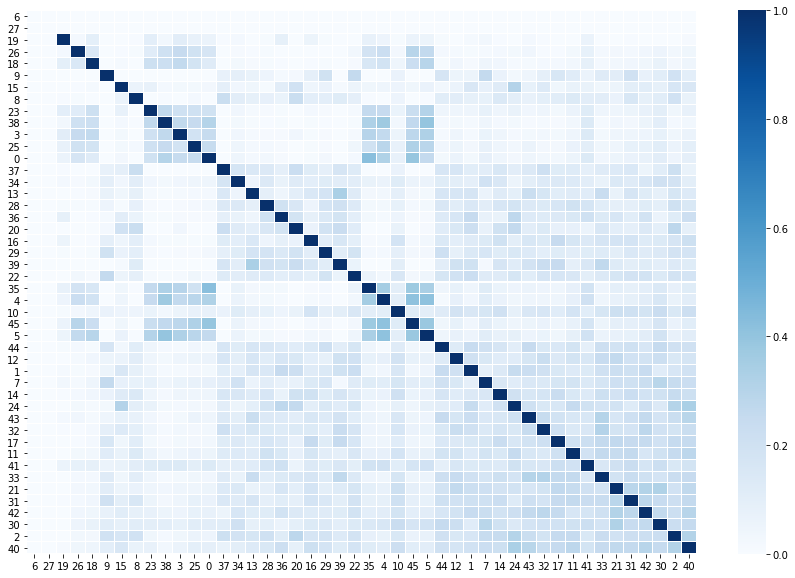

In [20]:
similariedad(X['E1 - Examples of Time Series Analysis']);

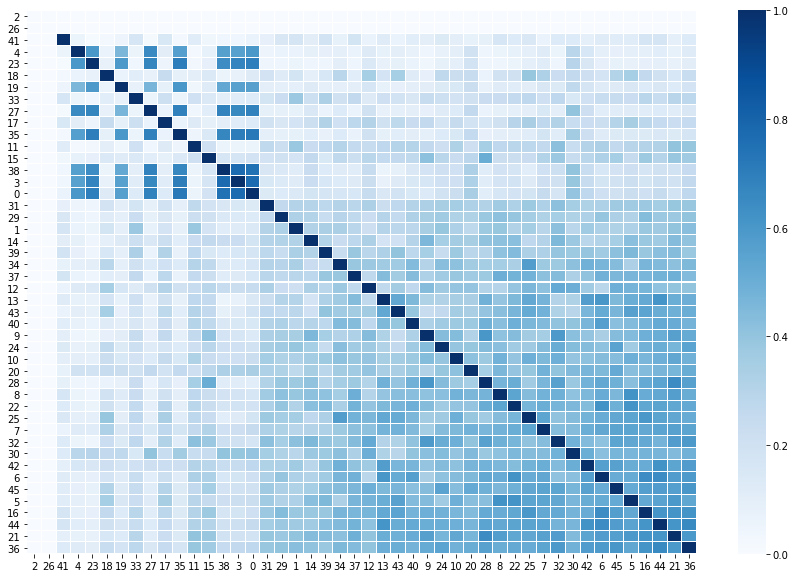

In [21]:
similariedad(X['E4 - Panel Data']);

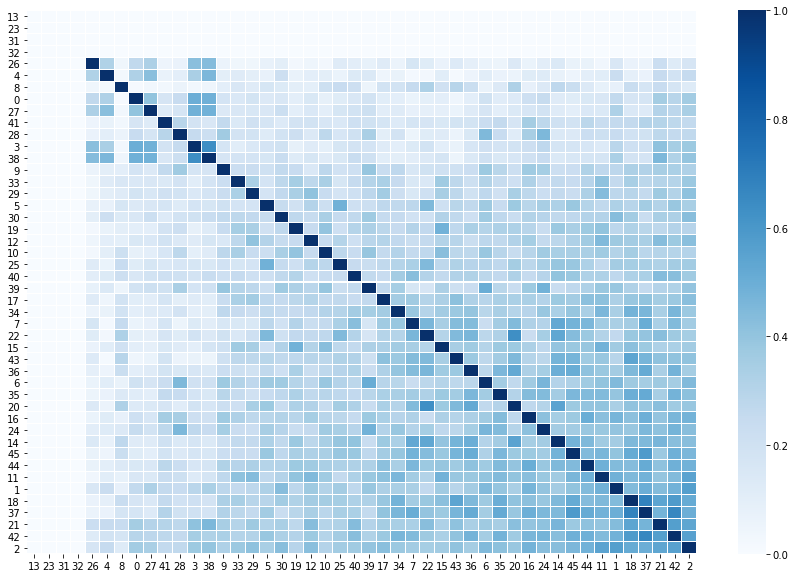

In [22]:
similariedad(X['E6 - Decison Trees']);

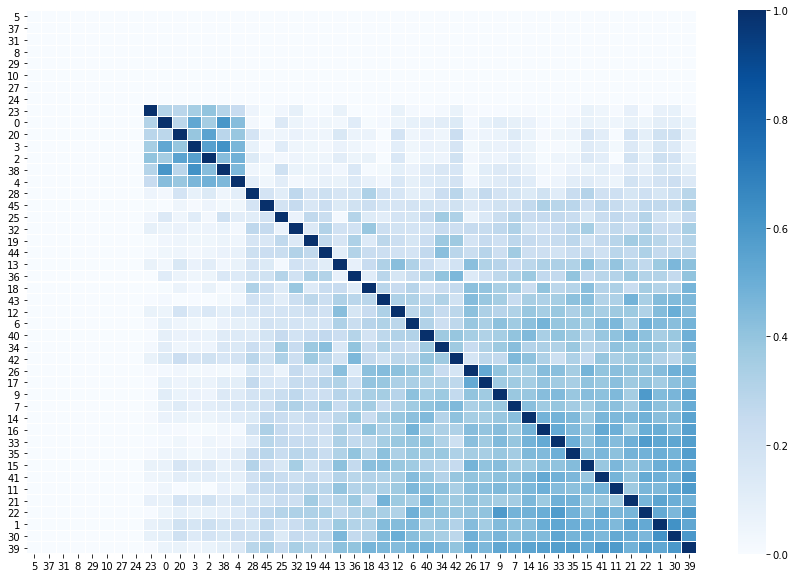

In [23]:
similariedad(X['E8 - Ensemble Trees Overview']);

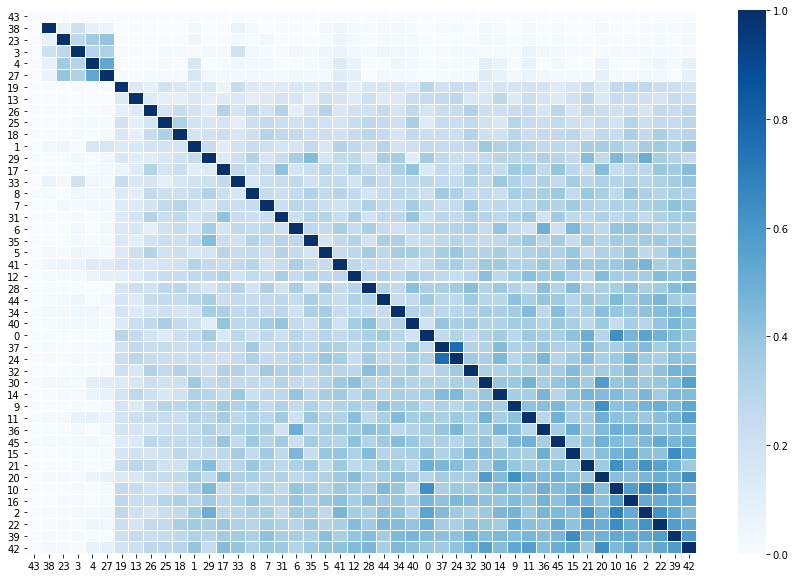

In [24]:
similariedad(X['E10 - REST-API']);

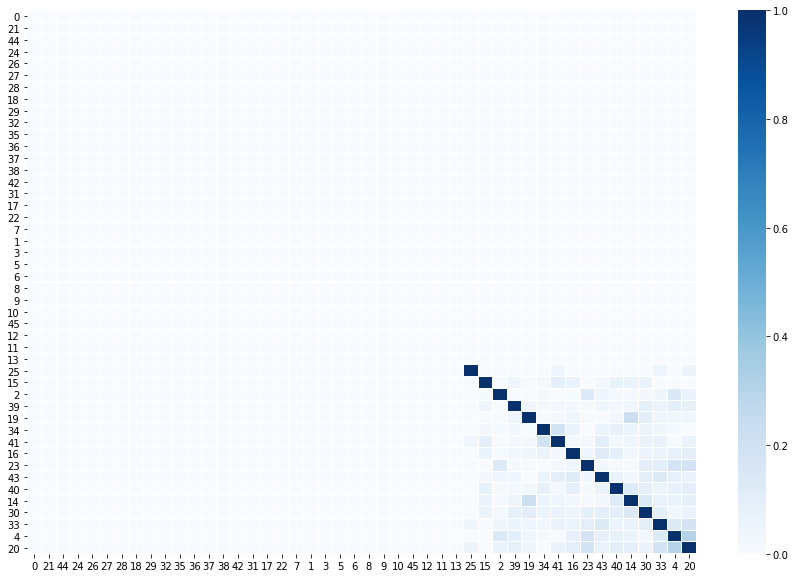

In [25]:
similariedad(X['E11 - Natural Language Processing Overview']);

Por estudiante

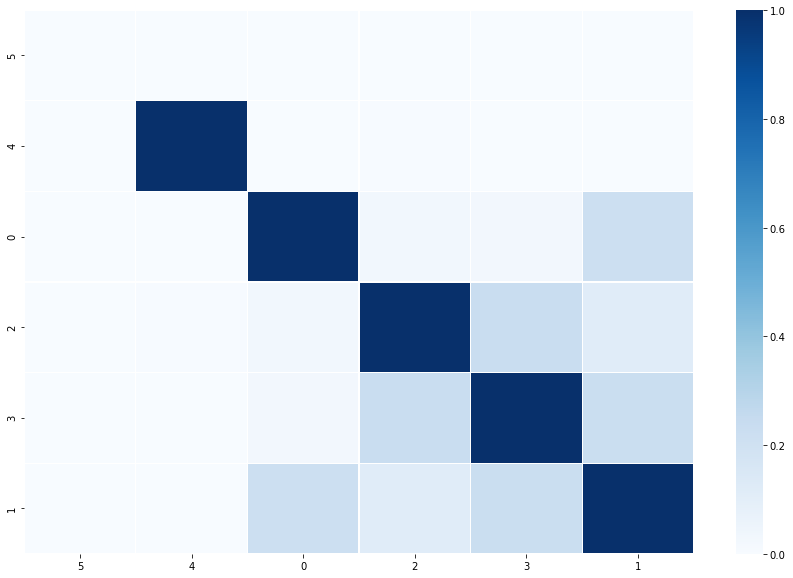

In [26]:
similariedad(X.iloc[0]);

# Exercise 13.3

Create a classifier to predict the gender of each student



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X=data.iloc[:,1:].sum(axis=1)

In [29]:
# create a document-term matrix using TF-IDFv
vect = TfidfVectorizer(stop_words=stopwords_total, strip_accents='ascii')
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
dtm.shape

(46, 6796)

In [30]:
X=pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
X=X.iloc[:,193:]
y=pd.get_dummies(data['Genero'])
y=y['F']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [33]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

param_grid = { 
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight':['balanced', 'None'],
    'degree':[2,3],
    'gamma':['scale', 'auto']
}

In [34]:
from sklearn.model_selection import GridSearchCV

CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 2, n_jobs = -1, verbose = 1, scoring='roc_auc')
CV_svm.fit(X_train, y_train)
CV_svm.best_params_

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  57 out of  64 | elapsed:   19.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   19.1s finished


{'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [35]:
clf = SVC(random_state=42, class_weight='balanced', degree= 2, gamma='scale', kernel='rbf')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [36]:
from sklearn.metrics import roc_auc_score

print('AUC: ',roc_auc_score(y_test, y_pred))

AUC:  0.5


In [37]:
pd.crosstab(y_test, y_pred)

col_0,0
F,
0,7
1,3


Se puede concluir que las palabras no son un buen predictor de el género de los estudiantes

# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [39]:
data['categoria'] = kmeans.fit_predict(X)

In [40]:
data

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,categoria
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,,2
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,,1
2,M,Una serie de tiempo es una colección de datos ...,,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",1
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,,2
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,2
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",,Los microservicios son servicios web con alcan...,,0
6,M,,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",,0
7,M,El análisis de series de tiempo (TSA) tiene un...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,,0
8,F,Ejemplo 1: número de estudiantes semestrales i...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,,Los microservicios es un tipo de arquitectura ...,,0
9,M,"Pronósticos de producción, análisis de inflaci...",Una serie de tiempo contiene observaciones de ...,Arboles de decisión \nLos árboles de decisión ...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,,0
